<a href="https://colab.research.google.com/github/Inayatph/fake-news-detection/blob/main/fake_news_detection(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

df=pd.read_csv('/content/drive/MyDrive/ML PROJECT/News.csv')
df

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...,...
44914,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44915,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44916,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44917,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df.isna().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [ ]:
df['Unnamed: 0'].value_counts()

0        2
14284    2
14282    2
14281    2
14280    2
        ..
22106    1
22105    1
22104    1
22103    1
23501    1
Name: Unnamed: 0, Length: 23502, dtype: int64

In [ ]:
df.drop(['title','subject','date','Unnamed: 0'],axis=1,inplace=True)
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44914,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
df['class'].value_counts()

0    23502
1    21417
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

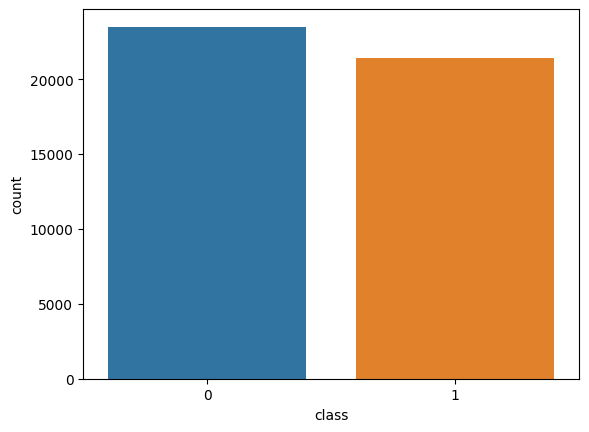

In [ ]:
sns.countplot(data=df,x='class',order=df['class'].value_counts().index)

In [ ]:
news=df.text
news

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44914    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44915    LONDON (Reuters) - LexisNexis, a provider of l...
44916    MINSK (Reuters) - In the shadow of disused Sov...
44917    MOSCOW (Reuters) - Vatican Secretary of State ...
44918    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44919, dtype: object

In [ ]:
news=news.str.replace('[^a-zA-Z0-9]+',' ')  #^= not in, +=used to jointly get the letters even if spcl character are removed in btw words,''= replace spcl char with space
news

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday it was revealed that former Milwauke...
3        On Christmas day Donald Trump announced that h...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44914    BRUSSELS Reuters NATO allies on Tuesday welcom...
44915    LONDON Reuters LexisNexis a provider of legal ...
44916    MINSK Reuters In the shadow of disused Soviet ...
44917    MOSCOW Reuters Vatican Secretary of State Card...
44918    JAKARTA Reuters Indonesia will buy 11 Sukhoi f...
Name: text, Length: 44919, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
news=news.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))     #2nd apply is used to seperate the words with space and to remove list
news

0        donald trump just couldn t wish all american a...
1        hous intellig committe chairman devin nune is ...
2        on friday it was reveal that former milwauke s...
3        on christma day donald trump announc that he w...
4        pope franci use his annual christma day messag...
                               ...                        
44914    brussel reuter nato alli on tuesday welcom pre...
44915    london reuter lexisnexi a provid of legal regu...
44916    minsk reuter in the shadow of disus soviet era...
44917    moscow reuter vatican secretari of state cardi...
44918    jakarta reuter indonesia will buy 11 sukhoi fi...
Name: text, Length: 44919, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
news=news.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
news

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
44914    brussel reuter nato alli tuesday welcom presid...
44915    london reuter lexisnexi provid legal regulator...
44916    minsk reuter shadow disus soviet era factori m...
44917    moscow reuter vatican secretari state cardin p...
44918    jakarta reuter indonesia buy 11 sukhoi fighter...
Name: text, Length: 44919, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(news)
print(X)

  (0, 45356)	0.017583489500365673
  (0, 38875)	0.023968471944574153
  (0, 21800)	0.053992729896844324
  (0, 14425)	0.03463022652267189
  (0, 69044)	0.028748167474801446
  (0, 65803)	0.0404544295375137
  (0, 58664)	0.025989083176260072
  (0, 9361)	0.033355924024406895
  (0, 95342)	0.027335787355985026
  (0, 70465)	0.019914742038905642
  (0, 39965)	0.023056474542927446
  (0, 65971)	0.023568689358537277
  (0, 23870)	0.04009944104697445
  (0, 86697)	0.017844029664440892
  (0, 43711)	0.038919727462500726
  (0, 92742)	0.018566306274714665
  (0, 4535)	0.05143256249481213
  (0, 10149)	0.03539654501862679
  (0, 72905)	0.07757554644732545
  (0, 65799)	0.04367714825854902
  (0, 37572)	0.04139962957123725
  (0, 93921)	0.07757554644732545
  (0, 93910)	0.052750503348691725
  (0, 86038)	0.022968588941635986
  (0, 85798)	0.039007361560360054
  :	:
  (44918, 36813)	0.03678104581158233
  (44918, 62764)	0.05124627030525648
  (44918, 29359)	0.05526097255171042
  (44918, 76040)	0.06182821487827082
  (44918

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzaaaacccchhh', 'zzzzzzzz',
       'zzzzzzzzzzzzz'], dtype=object)

In [ ]:
X.shape

(44919, 97895)

In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
44914    1
44915    1
44916    1
44917    1
44918    1
Name: class, Length: 44919, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
sv=SVC()
lst=[rf,knn,sv]
for i in lst:
  print('**********',i,'**********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

********** RandomForestClassifier() **********
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7057
           1       0.99      0.99      0.99      6419

    accuracy                           0.99     13476
   macro avg       0.99      0.99      0.99     13476
weighted avg       0.99      0.99      0.99     13476

********** KNeighborsClassifier() **********
